<a href="https://colab.research.google.com/github/springboardmentor5432x/DV---Optimizing-IT-Support-Team-Performance-Using-Analytics-Supportlytics-/blob/Dhanya-Shree-Optimizing-IT-Support-Team-Performance-Using-Analytics-Supportlytics/Technical%20Support%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-842289610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


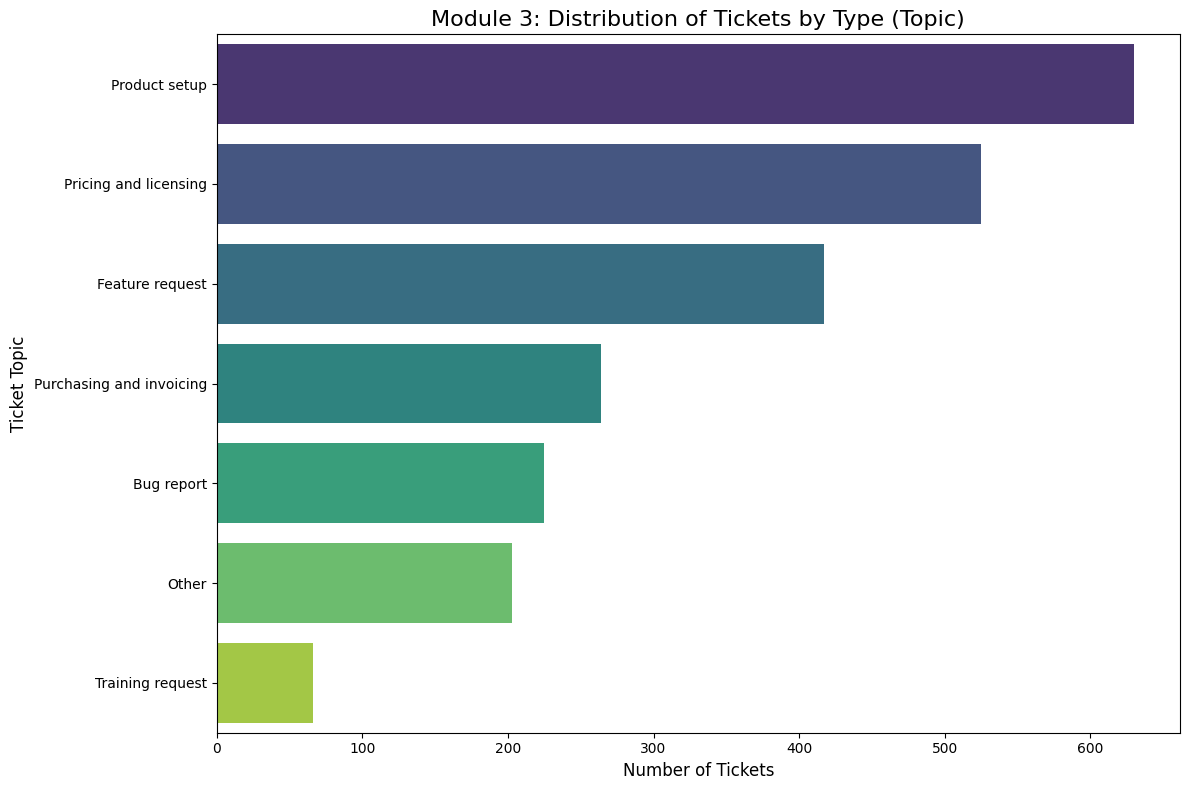

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Cleaned_Technical_Support_Dataset.csv')
plt.figure(figsize=(12, 8))

sns.countplot(
    data=df,
    y='Topic',
    order=df['Topic'].value_counts().index,
    palette='viridis'
)

plt.title('Module 3: Distribution of Tickets by Type (Topic)', fontsize=16)
plt.xlabel('Number of Tickets', fontsize=12)
plt.ylabel('Ticket Topic', fontsize=12)


plt.tight_layout()
plt.show()

Top Categories by Frequency:
Topic
Product setup               630
Pricing and licensing       525
Feature request             417
Purchasing and invoicing    264
Bug report                  225
Other                       203
Training request             66
Name: count, dtype: int64


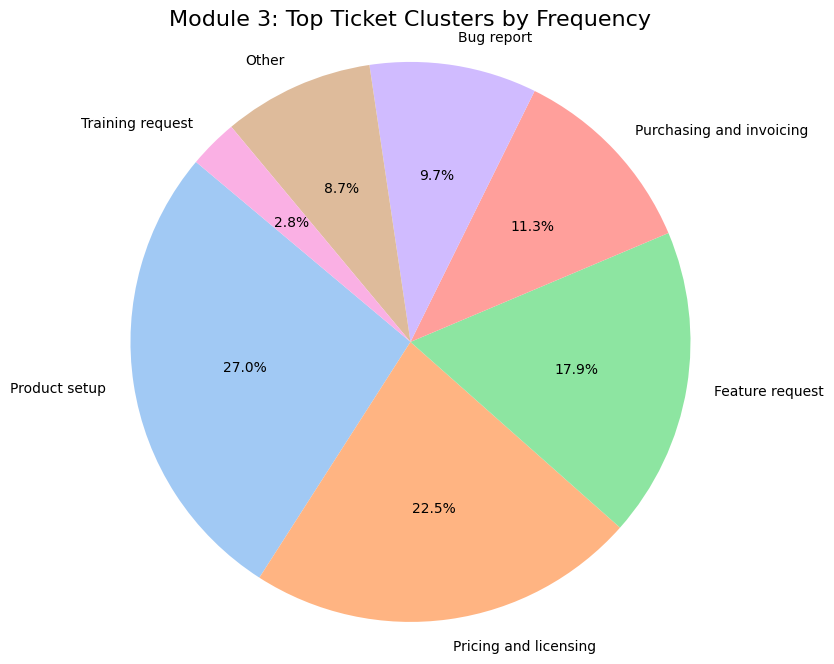

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Cleaned_Technical_Support_Dataset.csv')
topic_counts = df['Topic'].value_counts()
print("Top Categories by Frequency:")
print(topic_counts.head(10))
plt.figure(figsize=(10, 8))
top_categories = topic_counts.head(10)

plt.pie(
    top_categories,
    labels=top_categories.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

plt.title('Module 3: Top Ticket Clusters by Frequency', fontsize=16)
plt.axis('equal')
plt.show()

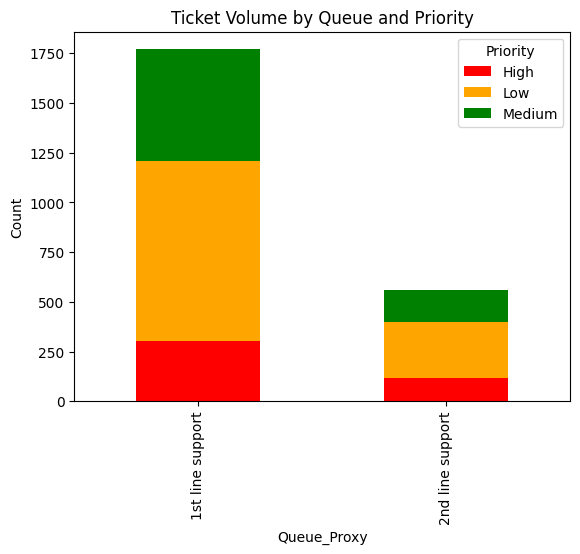

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Cleaned_Technical_Support_Dataset.csv')
df['Queue_Proxy'] = df['Agent Group']
plot_data = df.groupby(['Queue_Proxy', 'Priority']).size().unstack()

plot_data.plot(kind='bar', stacked=True, color=['red', 'orange', 'green'])
plt.title('Ticket Volume by Queue and Priority')
plt.ylabel('Count')
plt.show()

--- Cluster Insights Table ---
   Cluster  Size  Avg_Similarity  Avg_Resolution  Avg_Response  Avg_Priority  \
0        0   928          0.4021           34.65          0.44          2.37   
1        1   949          0.5335           32.54          0.43          1.00   
2        2    35          0.9701           14.68          0.03          1.74   

   Avg_Interactions  
0              4.32  
1              4.41  
2             60.00  


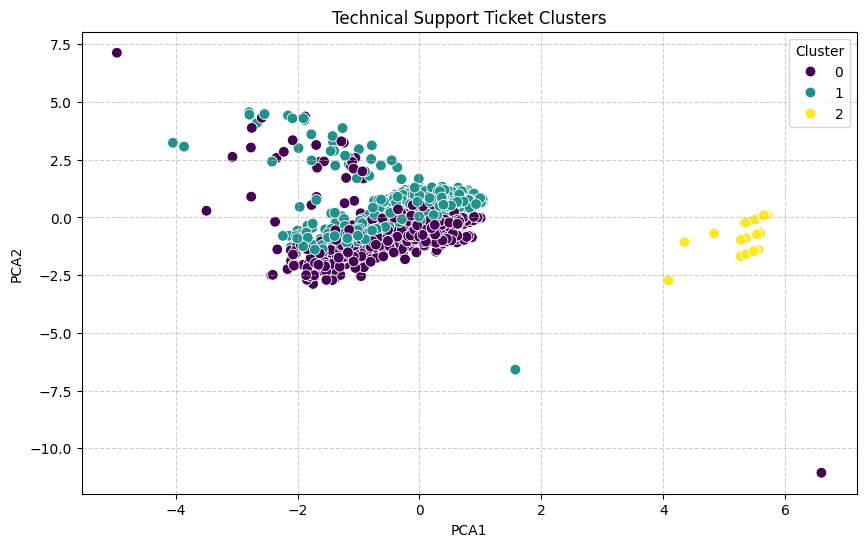

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# 1. Load the dataset
file_path = 'Cleaned_Technical_Support_Dataset.csv'
df = pd.read_csv('/content/Cleaned_Technical_Support_Dataset.csv')
features = ['Resolution_Duration', 'Response_Duration', 'Priority_Score', 'Agent interactions']
df_clust = df[features].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clust)

# Apply K-Means Clustering

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clust['Cluster'] = kmeans.fit_predict(scaled_features)
cluster_insights = []

for i in range(3):

    cluster_data = scaled_features[df_clust['Cluster'] == i]
    sim_matrix = cosine_similarity(cluster_data)
    if len(sim_matrix) > 1:
        avg_sim = (np.sum(sim_matrix) - len(sim_matrix)) / (len(sim_matrix) * (len(sim_matrix) - 1))
    else:
        avg_sim = 1.0
    averages = df_clust[df_clust['Cluster'] == i].mean()

    cluster_insights.append({
        'Cluster': i,
        'Size': len(cluster_data),
        'Avg_Similarity': round(avg_sim, 4),
        'Avg_Resolution': round(averages['Resolution_Duration'], 2),
        'Avg_Response': round(averages['Response_Duration'], 2),
        'Avg_Priority': round(averages['Priority_Score'], 2),
        'Avg_Interactions': round(averages['Agent interactions'], 2)
    })

insights_df = pd.DataFrame(cluster_insights)
print("--- Cluster Insights Table ---")
print(insights_df)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(scaled_features)
df_clust['PCA1'] = pca_res[:, 0]
df_clust['PCA2'] = pca_res[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clust, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=60)
plt.title('Technical Support Ticket Clusters')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

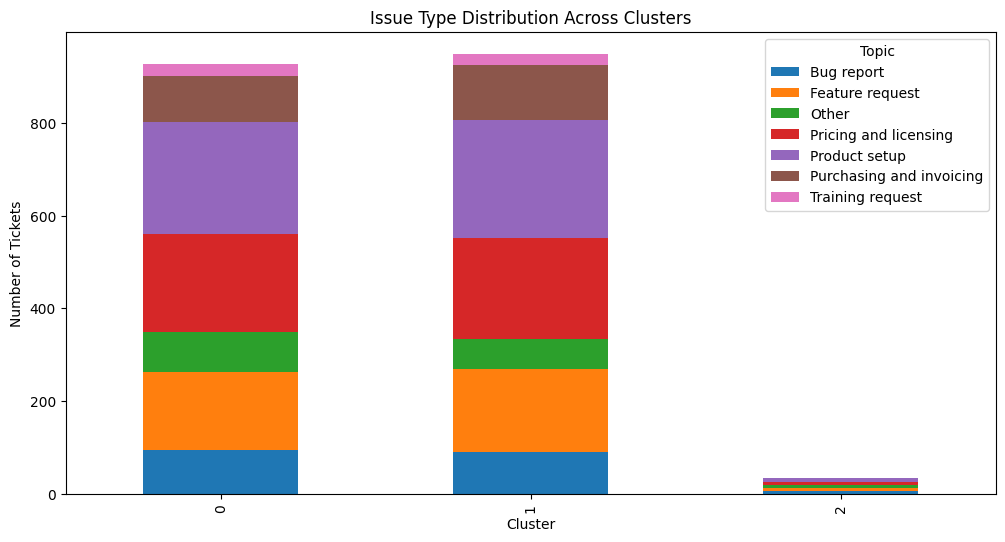

Topic    Bug report  Feature request  Other  Pricing and licensing  \
Cluster                                                              
0                95              167     86                    213   
1                91              178     66                    217   
2                 6                7      7                      6   

Topic    Product setup  Purchasing and invoicing  Training request  
Cluster                                                             
0                  240                       101                26  
1                  255                       118                24  
2                    9                         0                 0  


In [7]:

features = ['Resolution_Duration', 'Response_Duration', 'Priority_Score', 'Agent interactions']
df_clean = df[features + ['Topic']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[features])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(scaled_features)
cluster_vs_issue = df_clean.groupby(['Cluster', 'Topic']).size().unstack(fill_value=0)
cluster_vs_issue.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Issue Type Distribution Across Clusters')
plt.ylabel('Number of Tickets')
plt.show()
print(cluster_vs_issue)

/tmp/ipython-input-1430887544.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Resolution_Duration', data=df_clean, palette='Set2')


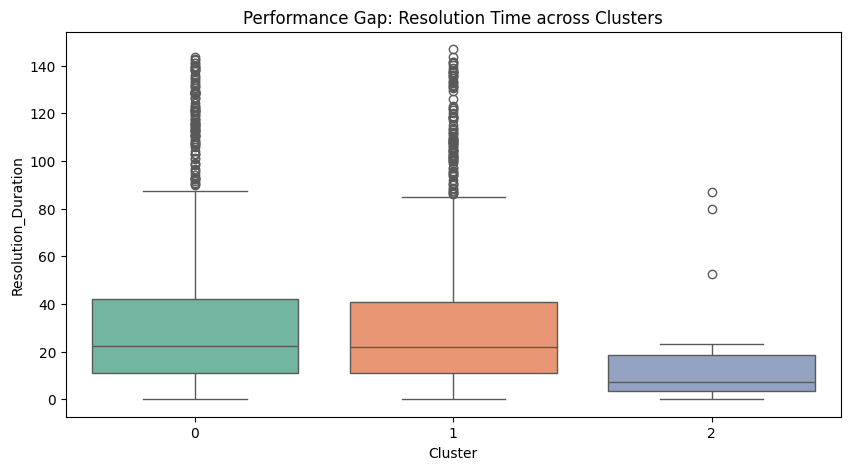

/tmp/ipython-input-1430887544.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Response_Duration', data=df_clean, palette='Set2')


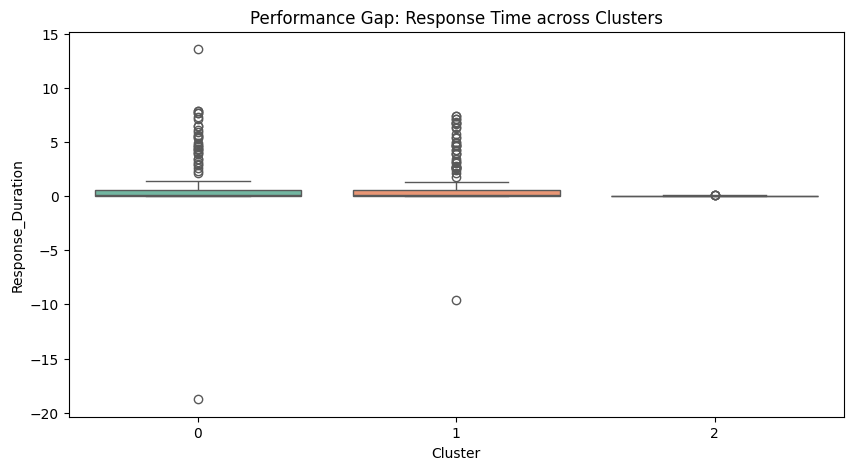

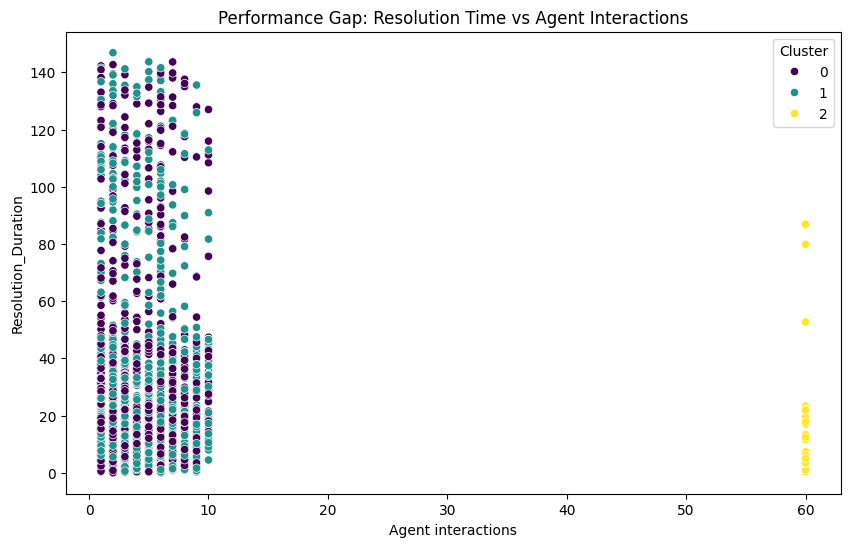

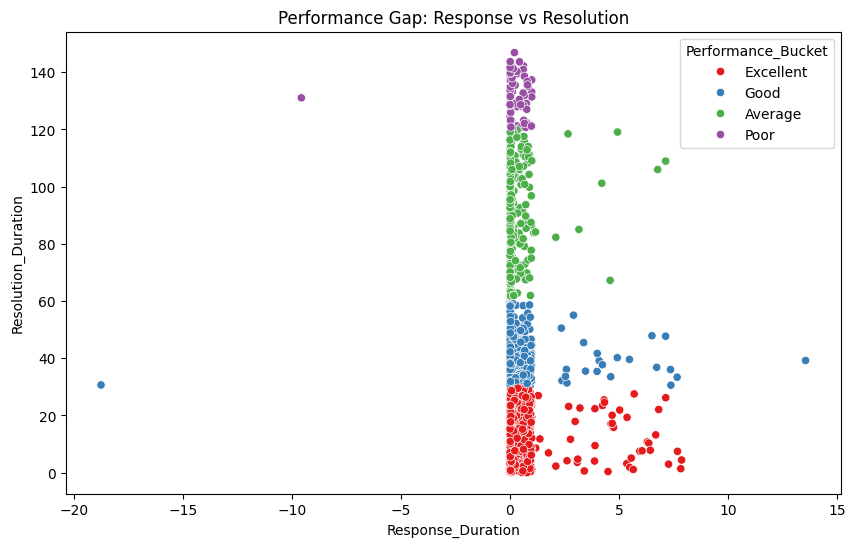

In [9]:
df_clean['Performance_Bucket'] = pd.cut(
    df_clean['Resolution_Duration'],
    bins=[0, 30, 60, 120, float('inf')],
    labels=['Excellent', 'Good', 'Average', 'Poor']
)

# 1. Boxplot: Resolution Gap by Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x='Cluster', y='Resolution_Duration', data=df_clean, palette='Set2')
plt.title('Performance Gap: Resolution Time across Clusters')
plt.show()

# 2. Boxplot: Response Gap by Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x='Cluster', y='Response_Duration', data=df_clean, palette='Set2')
plt.title('Performance Gap: Response Time across Clusters')
plt.show()

# 3. Scatter Plot: Interactions vs Resolution (by Cluster)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Agent interactions',
    y='Resolution_Duration',
    hue='Cluster',
    data=df_clean,
    palette='viridis'
)
plt.title('Performance Gap: Resolution Time vs Agent Interactions')
plt.show()

# 4. Scatter Plot: Response vs Resolution (by Performance Bucket)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Response_Duration',
    y='Resolution_Duration',
    hue='Performance_Bucket',
    data=df_clean,
    palette='Set1'
)
plt.title('Performance Gap: Response vs Resolution')
plt.show()